# Customer_Segmentation  using RFM Clustering

Customer segmentation is the process of separating customers into groups on the basis of their shared behavior or other attributes. The groups should be homogeneous within themselves and should also be heterogeneous to each other. The overall aim of this process is to identify high-value customer base i.e. customers that have the highest growth potential or are the most profitable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding Business Question 

### RFM Segmentation


RFM stands for Recency, Frequency, and Monetary. RFM analysis is a commonly used technique to generate and assign a score to each customer based on how recent their last transaction was (Recency), how many transactions they have made in the last year (Frequency), and what the monetary value of their transaction was (Monetary).

In [65]:
df = pd.read_csv('CS_08.csv')

In [66]:
df.head()

,order_id,created_ts,shamsy_date,customer_id,total_purchase
0,5c92a3d9a7b11b0001e4ec46,3/21/2019 0:04,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.0
1,5c92af8024aa9a00015b536d,3/21/2019 0:54,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.0
2,5c930b0ea7b11b0001e4f07e,3/21/2019 7:24,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.0
3,5c93157324aa9a00015b5750,3/21/2019 8:09,1398-Farvardin-1,59c52fe152faff00014e4932,220000.0
4,5c93250024aa9a00015b5884,3/21/2019 9:15,1398-Farvardin-1,58eba26fd601800001b98a34,360000.0


In [67]:
df.tail()

,order_id,created_ts,shamsy_date,customer_id,total_purchase
40532,5d35fd03b2cf38d2d17b11c9,7/22/2019 22:44,1398-Tir-31,58d2972b46e0fb0001e42133,280000.0
40533,5d35fe44ec2c893461deb4e0,7/22/2019 22:49,1398-Tir-31,597009a6c9e77c00018c27d9,300000.0
40534,5d35ff28b2cf38d2d17b1228,7/22/2019 22:53,1398-Tir-31,59222bce52faff00016c59cc,180000.0
40535,5d360499b2cf38d2d17b12f6,7/22/2019 23:16,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.0
40536,5d360b2eec2c893461deb667,7/22/2019 23:44,1398-Tir-31,5c46e8fe24aa9a00019af009,180000.0


In [68]:
df.shape

(40537, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        40537 non-null  object 
 1   created_ts      40537 non-null  object 
 2   shamsy_date     40537 non-null  object 
 3   customer_id     40537 non-null  object 
 4   total_purchase  40537 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [74]:
df.describe()


,total_purchase
count,4.053700e+04
mean,3.488023e+05
std,1.414450e+05
min,8.000000e+04
25%,2.600000e+05
50%,3.200000e+05
75%,4.200000e+05
max,3.200000e+06


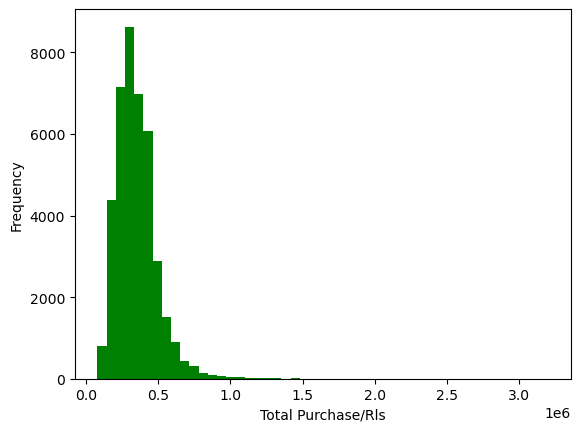

In [75]:
#Histogram of total purchase
plt.hist(df['total_purchase'], 
         color = 'green', 
         bins = np.linspace(df['total_purchase'].min(), 
                            df['total_purchase'].max(), 50))
plt.xlabel('Total Purchase/Rls')
plt.ylabel('Frequency')
plt.show()

In [76]:
#daily demand
df['created_ts'] = pd.to_datetime(df['created_ts'])


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        40537 non-null  object        
 1   created_ts      40537 non-null  datetime64[ns]
 2   shamsy_date     40537 non-null  object        
 3   customer_id     40537 non-null  object        
 4   total_purchase  40537 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ MB


In [31]:
df.iloc[0, 1]

Timestamp('2019-03-21 00:04:00')

In [78]:
df['created_ts'].dt.date

0        2019-03-21
1        2019-03-21
2        2019-03-21
3        2019-03-21
4        2019-03-21
            ...    
40532    2019-07-22
40533    2019-07-22
40534    2019-07-22
40535    2019-07-22
40536    2019-07-22
Name: created_ts, Length: 40537, dtype: object

In [79]:
df['date'] = df['created_ts'].dt.date

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40537 entries, 0 to 40536
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        40537 non-null  object        
 1   created_ts      40537 non-null  datetime64[ns]
 2   shamsy_date     40537 non-null  object        
 3   customer_id     40537 non-null  object        
 4   total_purchase  40537 non-null  float64       
 5   date            40537 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.9+ MB


In [80]:
daily_demand = df.groupby(by = ['date'])['order_id'].count()

In [81]:
daily_demand

date
2019-03-21      33
2019-03-22      21
2019-03-23      38
2019-03-24      27
2019-03-25      73
              ... 
2019-07-18     517
2019-07-19      56
2019-07-20     765
2019-07-21    1009
2019-07-22     982
Name: order_id, Length: 124, dtype: int64

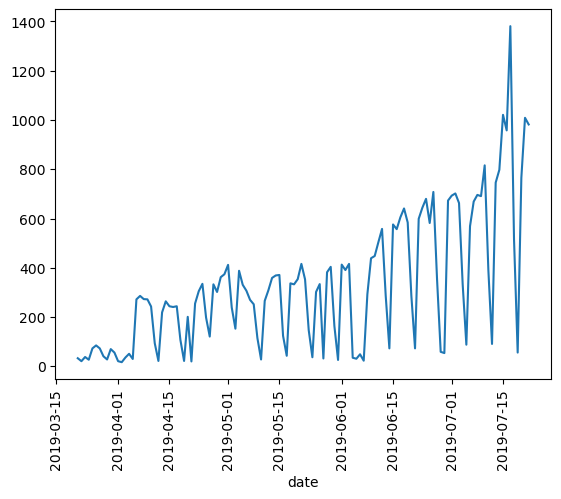

In [38]:
daily_demand.plot()
plt.xticks(rotation = 90) 
plt.show()

## Create RFM Dataset

### Frequency

In [82]:
customer_f = pd.DataFrame({'freq': df.groupby(by = ['customer_id'])['order_id'].count()})
customer_f

,freq
customer_id,
5.94687E+23,2
5.94772E+23,1
5.94773E+23,5
5.95E+25,1
58a4b0e452faff000179dbd0,7
...,...
5d3584f8b2cf38d2d17aafba,1
5d359600b2cf38d2d17ac0e7,1
5d35a06bb2cf38d2d17acbc3,1


Text(0, 0.5, 'Frequency')

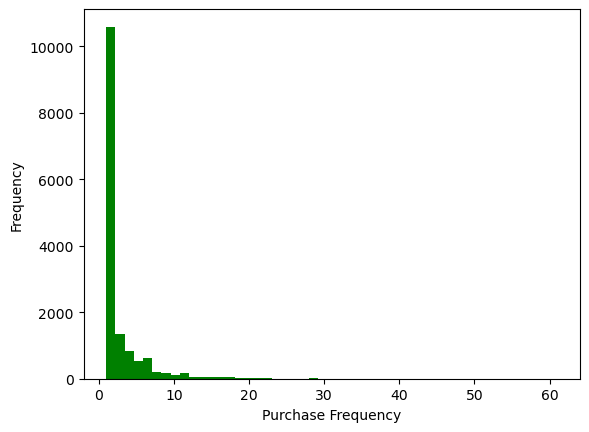

In [83]:
#Histogram of purchase frequency
plt.hist(customer_f['freq'], 
         color = 'green', 
         bins = np.linspace(customer_f['freq'].min(), customer_f['freq'].max(), 50))
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')

In [84]:
customer_f.describe()

,freq
count,14964.000000
mean,2.708968
std,3.425412
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,61.000000


In [85]:
df.tail()

,order_id,created_ts,shamsy_date,customer_id,total_purchase,date
40532,5d35fd03b2cf38d2d17b11c9,2019-07-22 22:44:00,1398-Tir-31,58d2972b46e0fb0001e42133,280000.0,2019-07-22
40533,5d35fe44ec2c893461deb4e0,2019-07-22 22:49:00,1398-Tir-31,597009a6c9e77c00018c27d9,300000.0,2019-07-22
40534,5d35ff28b2cf38d2d17b1228,2019-07-22 22:53:00,1398-Tir-31,59222bce52faff00016c59cc,180000.0,2019-07-22
40535,5d360499b2cf38d2d17b12f6,2019-07-22 23:16:00,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.0,2019-07-22
40536,5d360b2eec2c893461deb667,2019-07-22 23:44:00,1398-Tir-31,5c46e8fe24aa9a00019af009,180000.0,2019-07-22


In [86]:
r_date = pd.to_datetime('2019-07-23').date() - df['date']

In [87]:
r_date[0]

Timedelta('124 days 00:00:00')

In [48]:
r_date.dt.days

0        124
1        124
2        124
3        124
4        124
        ... 
40532      1
40533      1
40534      1
40535      1
40536      1
Name: date, Length: 40537, dtype: int64

In [88]:
df['r_date'] = r_date.dt.days
df


,order_id,created_ts,shamsy_date,customer_id,total_purchase,date,r_date
0,5c92a3d9a7b11b0001e4ec46,2019-03-21 00:04:00,1398-Farvardin-1,5bf1092b24aa9a000135ac7c,240000.0,2019-03-21,124
1,5c92af8024aa9a00015b536d,2019-03-21 00:54:00,1398-Farvardin-1,58d2fe9b46e0fb0001e432c0,620000.0,2019-03-21,124
2,5c930b0ea7b11b0001e4f07e,2019-03-21 07:24:00,1398-Farvardin-1,5c85f140a7b11b0001e65ec1,320000.0,2019-03-21,124
3,5c93157324aa9a00015b5750,2019-03-21 08:09:00,1398-Farvardin-1,59c52fe152faff00014e4932,220000.0,2019-03-21,124
4,5c93250024aa9a00015b5884,2019-03-21 09:15:00,1398-Farvardin-1,58eba26fd601800001b98a34,360000.0,2019-03-21,124
...,...,...,...,...,...,...,...
40532,5d35fd03b2cf38d2d17b11c9,2019-07-22 22:44:00,1398-Tir-31,58d2972b46e0fb0001e42133,280000.0,2019-07-22,1
40533,5d35fe44ec2c893461deb4e0,2019-07-22 22:49:00,1398-Tir-31,597009a6c9e77c00018c27d9,300000.0,2019-07-22,1
40534,5d35ff28b2cf38d2d17b1228,2019-07-22 22:53:00,1398-Tir-31,59222bce52faff00016c59cc,180000.0,2019-07-22,1
40535,5d360499b2cf38d2d17b12f6,2019-07-22 23:16:00,1398-Tir-31,5d19f78ab2cf38e5e4deddd6,180000.0,2019-07-22,1


In [89]:
customer_r = pd.DataFrame({'recency': df.groupby(by = ['customer_id'])['r_date'].min()})
customer_r

,recency
customer_id,
5.94687E+23,9
5.94772E+23,64
5.94773E+23,9
5.95E+25,5
58a4b0e452faff000179dbd0,7
...,...
5d3584f8b2cf38d2d17aafba,1
5d359600b2cf38d2d17ac0e7,1
5d35a06bb2cf38d2d17acbc3,1


Text(0, 0.5, 'Frequency')

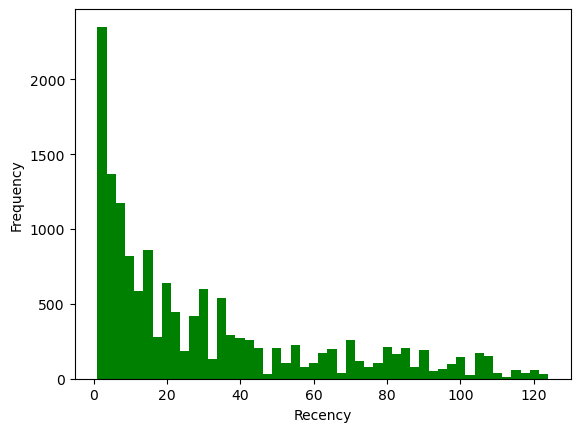

In [52]:
#Histogram of recency
plt.hist(customer_r['recency'], color = 'green', 
         bins = np.linspace(customer_r['recency'].min(), customer_r['recency'].max(), 50))
plt.xlabel('Recency')
plt.ylabel('Frequency')

In [90]:
customer_r.describe()

,recency
count,14964.000000
mean,30.497995
std,30.833106
min,1.000000
25%,7.000000
50%,19.000000
75%,43.000000
max,124.000000


## Monetary

In [91]:
customer_m = pd.DataFrame({'monetary': df.groupby(by = ['customer_id'])['total_purchase'].sum()})
customer_m

,monetary
customer_id,
5.94687E+23,680000.0
5.94772E+23,600000.0
5.94773E+23,1700000.0
5.95E+25,320000.0
58a4b0e452faff000179dbd0,1480000.0
...,...
5d3584f8b2cf38d2d17aafba,200000.0
5d359600b2cf38d2d17ac0e7,520000.0
5d35a06bb2cf38d2d17acbc3,440000.0


## RFM Dataframe for Customers

In [92]:
df = customer_f.merge(customer_r, left_index = True, right_index = True)
df

,freq,recency
customer_id,,
5.94687E+23,2,9
5.94772E+23,1,64
5.94773E+23,5,9
5.95E+25,1,5
58a4b0e452faff000179dbd0,7,7
...,...,...
5d3584f8b2cf38d2d17aafba,1,1
5d359600b2cf38d2d17ac0e7,1,1
5d35a06bb2cf38d2d17acbc3,1,1


In [93]:
rfm_customer = df.merge(customer_m, left_index = True, right_index = True)

In [94]:
rfm_customer

,freq,recency,monetary
customer_id,,,
5.94687E+23,2,9,680000.0
5.94772E+23,1,64,600000.0
5.94773E+23,5,9,1700000.0
5.95E+25,1,5,320000.0
58a4b0e452faff000179dbd0,7,7,1480000.0
...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0
5d359600b2cf38d2d17ac0e7,1,1,520000.0
5d35a06bb2cf38d2d17acbc3,1,1,440000.0


In [96]:
#Remove some dataframes to free RAM
del(customer_r, customer_f, customer_m, df, data)

NameError: name 'customer_r' is not defined

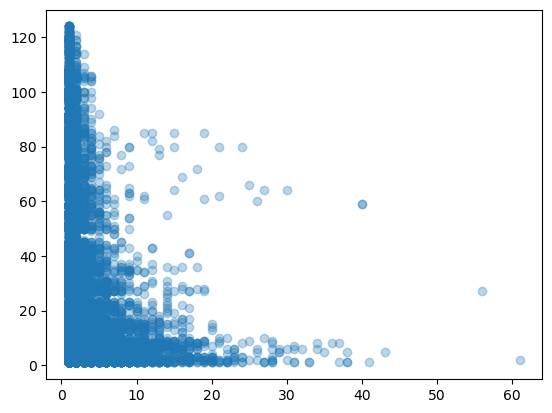

In [97]:
plt.scatter(x = rfm_customer['freq'], 
            y = rfm_customer['recency'], alpha = 0.3)

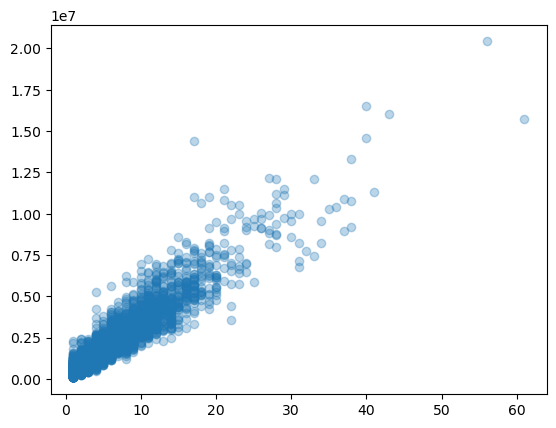

In [98]:
plt.scatter(x = rfm_customer['freq'], 
            y = rfm_customer['monetary'], alpha = 0.3)

In [99]:
rfm_customer[['freq', 'monetary']].corr(method = 'pearson')

,freq,monetary
freq,1.000000,0.947786
monetary,0.947786,1.000000


In [100]:
rfm_customer_2 = rfm_customer.loc[:, ['freq', 'recency']]

In [101]:
rfm_customer_2

,freq,recency
customer_id,,
5.94687E+23,2,9
5.94772E+23,1,64
5.94773E+23,5,9
5.95E+25,1,5
58a4b0e452faff000179dbd0,7,7
...,...,...
5d3584f8b2cf38d2d17aafba,1,1
5d359600b2cf38d2d17ac0e7,1,1
5d35a06bb2cf38d2d17acbc3,1,1


In [102]:
#Scale features
from sklearn.preprocessing import StandardScaler

In [103]:
scaled_data = StandardScaler().fit_transform(rfm_customer_2)
scaled_data

array([[-0.20698004, -0.69726072],
       [-0.49892549,  1.08659584],
       [ 0.66885632, -0.69726072],
       ...,
       [-0.49892549, -0.95673077],
       [-0.49892549, -0.95673077],
       [-0.49892549, -0.95673077]])

In [104]:
scaled_data = pd.DataFrame(scaled_data, 
                           columns = rfm_customer_2.columns, 
                           index = rfm_customer_2.index)

scaled_data

,freq,recency
customer_id,,
5.94687E+23,-0.206980,-0.697261
5.94772E+23,-0.498925,1.086596
5.94773E+23,0.668856,-0.697261
5.95E+25,-0.498925,-0.826996
58a4b0e452faff000179dbd0,1.252747,-0.762128
...,...,...
5d3584f8b2cf38d2d17aafba,-0.498925,-0.956731
5d359600b2cf38d2d17ac0e7,-0.498925,-0.956731
5d35a06bb2cf38d2d17acbc3,-0.498925,-0.956731


In [105]:
scaled_data.describe()

,freq,recency
count,1.496400e+04,1.496400e+04
mean,2.659075e-17,-1.139603e-17
std,1.000033e+00,1.000033e+00
min,-4.989255e-01,-9.567308e-01
25%,-4.989255e-01,-7.621282e-01
50%,-4.989255e-01,-3.729232e-01
75%,8.496541e-02,4.054870e-01
max,1.701780e+01,3.032621e+00


## K-means Clustering

In [106]:
#First try
from sklearn.cluster import KMeans
seg_km1 = KMeans(n_clusters = 5, 
                 init = 'random', 
                 random_state = 123, 
                 n_init = 1).fit(scaled_data)

In [107]:
rfm_customer['seg_km1'] = seg_km1.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1
customer_id,,,,
5.94687E+23,2,9,680000.0,0
5.94772E+23,1,64,600000.0,2
5.94773E+23,5,9,1700000.0,4
5.95E+25,1,5,320000.0,0
58a4b0e452faff000179dbd0,7,7,1480000.0,4
...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,0
5d359600b2cf38d2d17ac0e7,1,1,520000.0,0
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,0


In [108]:
rfm_customer['seg_km1'].isnull().sum()

0

In [109]:
#Results
rfm_customer.groupby(['seg_km1'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km1,,,
0,1.600363,9.873286,5.718949e+05
1,15.992832,9.996416,5.461541e+06
2,1.512330,40.665558,5.341036e+05
3,1.288755,88.822892,4.376867e+05
4,5.882431,10.248447,2.046477e+06


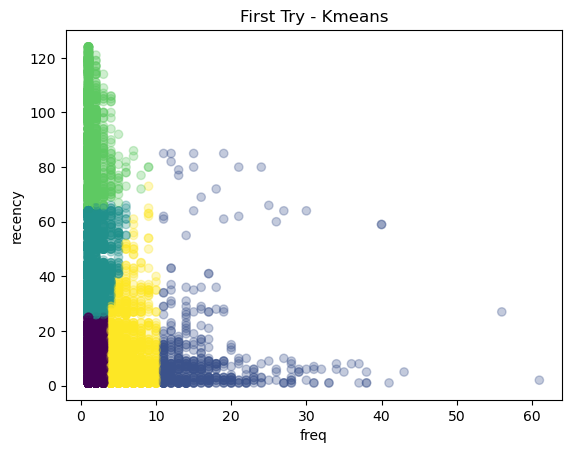

In [110]:
#Scatter Plot - First Try
plt.scatter(x = rfm_customer['freq'], 
            y = rfm_customer['recency'], 
            c = rfm_customer['seg_km1'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')
plt.title('First Try - Kmeans')
plt.show()

In [111]:
#Second try
from sklearn.cluster import KMeans
seg_km2 = KMeans(n_clusters = 5, 
                 init = 'random', 
                 random_state = 1000, 
                 n_init = 1).fit(scaled_data)

In [112]:
rfm_customer['seg_km2'] = seg_km2.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1,seg_km2
customer_id,,,,,
5.94687E+23,2,9,680000.0,0,3
5.94772E+23,1,64,600000.0,2,4
5.94773E+23,5,9,1700000.0,4,2
5.95E+25,1,5,320000.0,0,3
58a4b0e452faff000179dbd0,7,7,1480000.0,4,2
...,...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,0,3
5d359600b2cf38d2d17ac0e7,1,1,520000.0,0,3
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,0,3


In [113]:
#Results
rfm_customer.groupby(['seg_km2'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km2,,,
0,16.001795,9.861759,5.464201e+06
1,1.297686,88.679170,4.410694e+05
2,5.889978,10.173274,2.049149e+06
3,1.600363,9.873286,5.718949e+05
4,1.515959,40.534832,5.352484e+05


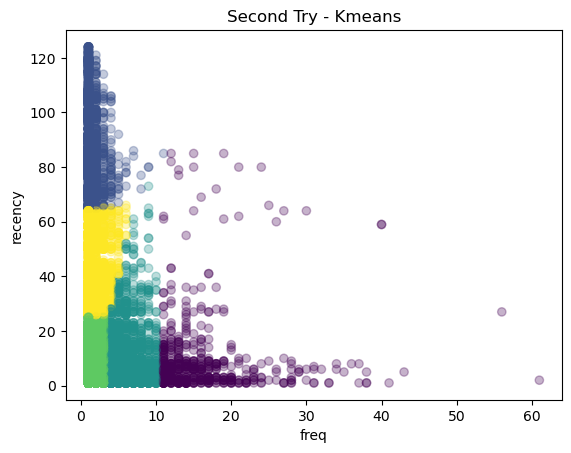

In [114]:
#Scatter Plot - Second Try
plt.scatter(x = rfm_customer['freq'], 
            y = rfm_customer['recency'], 
            c = rfm_customer['seg_km2'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')
plt.title('Second Try - Kmeans')
plt.show()

## K-means ++

n_init: sets the number of initializations to perform. 
The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

In [115]:
#First Try
from sklearn.cluster import KMeans
seg_km3 = KMeans(n_clusters = 5, 
                 init = 'k-means++', 
                 random_state = 1000, 
                 n_init = 15).fit(scaled_data)

In [116]:
rfm_customer['seg_km3'] = seg_km3.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1,seg_km2,seg_km3
customer_id,,,,,,
5.94687E+23,2,9,680000.0,0,3,0
5.94772E+23,1,64,600000.0,2,4,4
5.94773E+23,5,9,1700000.0,4,2,1
5.95E+25,1,5,320000.0,0,3,0
58a4b0e452faff000179dbd0,7,7,1480000.0,4,2,1
...,...,...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,0,3,0
5d359600b2cf38d2d17ac0e7,1,1,520000.0,0,3,0
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,0,3,0


In [117]:
#Results
rfm_customer.groupby(['seg_km3'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km3,,,
0,1.833882,9.707273,6.540527e+05
1,7.409015,10.050640,2.575548e+06
2,1.291134,88.687300,4.391454e+05
3,19.317308,10.339744,6.512821e+06
4,1.556010,40.378305,5.475988e+05


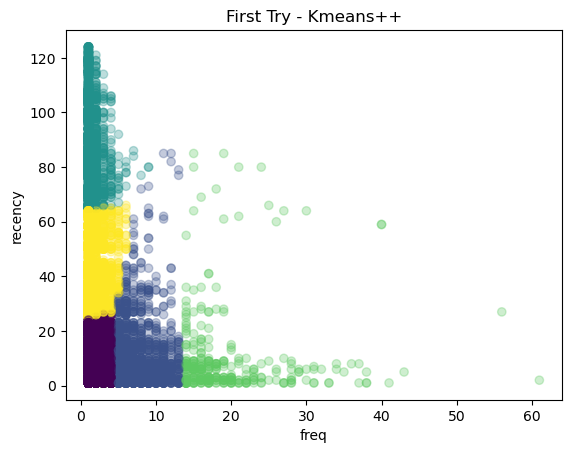

In [118]:
#Scatter Plot - First Try
plt.scatter(x = rfm_customer['freq'], 
            y = rfm_customer['recency'], 
            c = rfm_customer['seg_km3'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')
plt.title('First Try - Kmeans++')
plt.show()

In [119]:
#Second Try
from sklearn.cluster import KMeans
seg_km4 = KMeans(n_clusters = 5, 
                 init = 'k-means++', 
                 random_state = 1234, 
                 n_init = 15).fit(scaled_data)

In [120]:
rfm_customer['seg_km4'] = seg_km4.predict(scaled_data)
rfm_customer

,freq,recency,monetary,seg_km1,seg_km2,seg_km3,seg_km4
customer_id,,,,,,,
5.94687E+23,2,9,680000.0,0,3,0,1
5.94772E+23,1,64,600000.0,2,4,4,0
5.94773E+23,5,9,1700000.0,4,2,1,2
5.95E+25,1,5,320000.0,0,3,0,1
58a4b0e452faff000179dbd0,7,7,1480000.0,4,2,1,2
...,...,...,...,...,...,...,...
5d3584f8b2cf38d2d17aafba,1,1,200000.0,0,3,0,1
5d359600b2cf38d2d17ac0e7,1,1,520000.0,0,3,0,1
5d35a06bb2cf38d2d17acbc3,1,1,440000.0,0,3,0,1


In [121]:
#Results
rfm_customer.groupby(['seg_km4'])[['freq', 'recency', 'monetary']].mean()

,freq,recency,monetary
seg_km4,,,
0,1.550369,40.388752,5.459023e+05
1,1.833882,9.707273,6.540527e+05
2,7.208262,10.183592,2.507229e+06
3,1.291134,88.687300,4.391454e+05
4,18.298387,10.056452,6.181882e+06


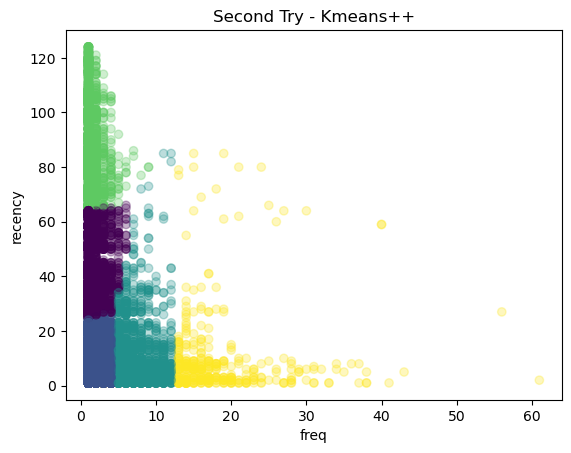

In [122]:
#Scatter Plot - Second Try
plt.scatter(x = rfm_customer['freq'], y = rfm_customer['recency'], 
            c = rfm_customer['seg_km4'], alpha = 0.3)
plt.xlabel('freq')
plt.ylabel('recency')
plt.title('Second Try - Kmeans++')
plt.show()

# Optimal Number of Clusters

### Perform Elbow Method to find Optimal No. of Clusters

In [7]:
from sklearn.cluster import KMeans


In [123]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, 
                    init = 'k-means++', 
                    random_state = 1234, 
                    n_init = 10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

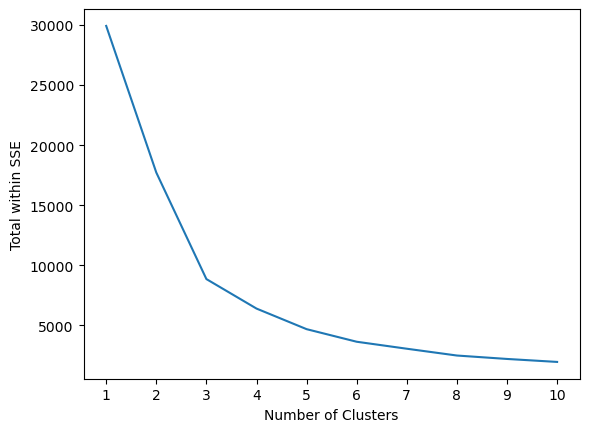

In [124]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Total within SSE")
plt.show()

### Silhouette Coefficient

In [125]:
from sklearn.metrics import silhouette_score

In [126]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, 
                    init = 'k-means++', 
                    random_state = 1234, 
                    n_init = 10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

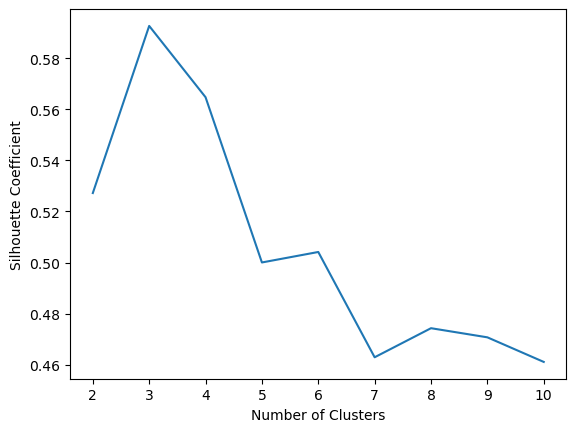

In [127]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### GitHub: https://github.com/elihe90/Customer_Segmentation-using-RFM-Clustering